# <center>Analyzing & Predicting Massachusetts Crash Data </center>

## 1. Introduction

###  1.1 Background

Every crash reported to a police department in the United States of America gets its details recorded by the police and added to the respective cities' database.<br>
These records have attributes that help provide data and statics regarding the kind and severity of accidents on the roads.  <br>
This information can be used to monitor the statistics of crashes over time and can be key in determinng where to implement transportation and infrastructure changes.<br>

### 1.2 Problem & Interest

The State of Massachusetts wants to rank as number 1 in the 'The Safest US State to Drive' List by 2027. This will aid in attracting more tourists and business to the state. <br>
The Massachusetts Department of Transportation has therefore been tasked with the mission of coming up with ways to reduce the number of crashes, damages, injuries and fatalities. <br>
Some of the options they are considering are: improving road conditions, reconfiguring roads, facilitating other transportation options and/or changes to traffic laws.<br>
In order to complete this mission data needs to be analyzed regarding the crashes that happened in 2019 so that major issues/areas of concern can be addressed and specific plan of action can be set in place in order to achieve this goal<br>
Budget allocation for this mission will depend on the scope of how much work is recommended by the analysis

## 2. Data Acquisition

### 2.1 Data Sources

Main data source is from the following link: <a href="https://massdot-impact-crashes-vhb.opendata.arcgis.com/datasets/2019-crashes-/data"> MassDOT Crash Open Data Portal</a> . <br>
The 2019 Crashes data will be used to provide the analysis needed by looking at crash severity and road conditions of where crashes tend to occur the most.<br>
This data set includes accident severity attributes in terms of fatalities, property damage and number of vehicles involved. It can be used to predict crashes in other roads not included in the dataset and thus be leveraged to prevent crashes on such roads by making needed changes.<br>
A 2nd data set showing Massachusetts population will be from the following link: <a href="https://www.indexmundi.com/facts/united-states/quick-facts/massachusetts/population#table"> 2019 Massachusetts Population by County</a>. This data will be used to provide a comparison between population vs crash volumes

### 2.2 Data Cleaning

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np # library to handle data in a vectorized manner

import seaborn as sns

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [2]:
#loading data downloaded from MassDOT Crash Open Data Portal via Watson Studio Data Sets option
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0



body = client_7090f3b6e11b417eb236ff2a39fb8dd7.get_object(Bucket='couseracapstoneweek2-donotdelete-pr-pduld7znrtgfwa',Key='2019Crashes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (96,108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH_DATETIME,OBJECTID,CRASH_NUMB,CITY_TOWN_NAME,CRASH_DATE_TEXT,CRASH_TIME_2,CRASH_HOUR,CRASH_STATUS,CRASH_SEVERITY_DESCR,MAX_INJR_SVRTY_CL,NUMB_VEHC,NUMB_NONFATAL_INJR,NUMB_FATAL_INJR,POLC_AGNCY_TYPE_DESCR,MANR_COLL_DESCR,VEHC_MNVR_ACTN_CL,VEHC_TRVL_DIRC_CL,VEHC_SEQ_EVENTS_CL,AMBNT_LIGHT_DESCR,WEATH_COND_DESCR,ROAD_SURF_COND_DESCR,FIRST_HRMF_EVENT_DESCR,MOST_HRMFL_EVT_CL,DRVR_CNTRB_CIRC_CL,VEHC_CONFIG_CL,STREET_NUMB,RDWY,DIST_DIRC_FROM_INT,NEAR_INT_RDWY,MM_RTE,DIST_DIRC_MILEMARKER,MILEMARKER,EXIT_RTE,DIST_DIRC_EXIT,EXIT_NUMB,DIST_DIRC_LANDMARK,LANDMARK,RDWY_JNCT_TYPE_DESCR,TRAF_CNTRL_DEVC_TYPE_DESCR,TRAFY_DESCR_DESCR,JURISDICTN,FIRST_HRMF_EVENT_LOC_DESCR,NON_MTRST_TYPE_CL,NON_MTRST_ACTN_CL,NON_MTRST_LOC_CL,IS_GEOCODED,GEOCODING_METHOD_NAME,X,Y,LAT,LON,RMV_DOC_IDS,CRASH_RPT_IDS,YEAR,AGE_DRVR_YNGST,AGE_DRVR_OLDEST,AGE_NONMTRST_YNGST,AGE_NONMTRST_OLDEST,DRVR_DISTRACTED_CL,DISTRICT_NUM,RPA_ABBR,VEHC_EMER_USE_CL,VEHC_TOWED_FROM_SCENE_CL,CNTY_NAME,FMCSA_RPTBL_CL,FMCSA_RPTBL,HIT_RUN_DESCR,LCLTY_NAME,ROAD_CNTRB_DESCR,SCHL_BUS_RELD_DESCR,SPEED_LIMIT,TRAF_CNTRL_DEVC_FUNC_DESCR,WORK_ZONE_RELD_DESCR,AADT,AADT_YEAR,PK_PCT_SUT,AV_PCT_SUT,PK_PCT_CT,AV_PCT_CT,CURB,TRUCK_RTE,LT_SIDEWLK,RT_SIDEWLK,SHLDR_LT_W,SHLDR_LT_T,SURFACE_WD,SURFACE_TP,SHLDR_RT_W,SHLDR_RT_T,NUM_LANES,OPP_LANES,MED_WIDTH,MED_TYPE,URBAN_TYPE,F_CLASS,URBAN_AREA,FD_AID_RTE,FACILITY,OPERATION,CONTROL,PEAK_LANE,SPEED_LIM,STREETNAME,FROMSTREETNAME,TOSTREETNAME,CITY,STRUCT_CND,TERRAIN,URBAN_LOC_TYPE,AADT_DERIV,STATN_NUM,OP_DIR_SL,SHLDR_UL_T,SHLDR_UL_W,F_F_CLASS,SHAPE
0,2019/01/01 01:00:00+00,2504847,4643564,ATTLEBORO,1/1/2019,1:00:00,1:00:00,Open,Property damage only (none injured),No injury,1,0,0,Local police,Single vehicle crash,V1: Travelling straight ahead,V1: E,"V1:(Collision with embankment),(Collision wit...",Dark - lighted roadway,Rain,Wet,Collision with embankment,V1:(Collision with embankment),NaN,V1:(Passenger car),787,WEST ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CUL DE SAC NEAR RTE 95 SB,Not at junction,No controls,"Two-way, not divided",City or Town accepted road,Outside roadway,NaN,NaN,NaN,Yes,At Address,215161.5115,854356.1291,41.939413,-71.317171,PW201903201323 / PW201900200118,1900000040 / 1900000040,2019,21-24,21-24,NaN,NaN,NaN,5,SRPEDD,V1:(No),"V1:(Yes, vehicle or trailer disabled)",BRISTOL,NaN,NaN,"Yes, hit and run",NaN,None,"No, school bus not involved",NaN,"No, device not functioning",Yes,1184.0,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,0.0,0.0,No Shoulder,28.0,Surface-treated road,2.0,Stable - Unruttable compacted subgrade,2.0,0.0,0.0,None,Large Urbanized Area,Local,Providence (RI-MA),NaN,Mainline roadway,Two-way traffic,No Access Control,NaN,NaN,WEST STREET,NEWPORT AVENUE,CUL_DE_SAC,ATTLEBORO,Fair,Level Terrain,NaN,NaN,NaN,NaN,0,0.0,Local,NaN
1,2019/01/01 00:56:00+00,2504850,4643567,SALEM,1/1/2019,12:56:00,12:00:00,Open,Non-fatal injury,Non-fatal injury - Possible,2,1,0,Local police,Angle,V1: Turning left / V2: Turning right,V1: E / V2: E,"V1:(Collision with motor vehicle in traffic),...",Dark - lighted roadway,Rain/Rain,Wet,Collision with motor vehicle in traffic,V1:(Collision with motor vehicle in traffic) /...,"D1: (No improper driving),(No improper driving)","V1:(Passenger car) / V2:(Light truck(van, mini...",NaN,CONGRESS/DERBY / CONGRESS ST / DERBY ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Four-way intersection,Traffic control signal,"Two-way, divided, positive median barrier",City or Town accepted road,Roadway,NaN,NaN,NaN,Yes,At Intersection,250114.1248,919085.0624,42.520699,-70.890113,PW201903201863 / PW201900200121,1900000007 / 1900000007,2019,18-20,25-34,NaN,NaN,D1: Manually operating an electronic device /...,4,MAPC,V1:(No) / V2:(No),NaN,ESSEX,NaN,NaN,No hit and run,NaN,"Road surface condition (wet, icy, snow, slush,...","No, school bus not involved",NaN,"Yes, device functioning",No,25134.0,2013.0,0.241,554.0,0.082,256.0,Both sides,Not a parkway - not on a designated truck route,8.0,8.0,0.0,No Shoulder,34.0,Bituminous concrete road,0.0,No Shoulder,2.0,

In [3]:
df.shape

(139109, 116)

In [4]:
#column_names = ['CRASH_DATE_TEXT','CRASH_SEVERITY_DESCR']
#state = pd.DataFrame(columns = column_names)
#state

In [5]:
#select a subset of needed columns from dataset that will be used in most of the analysis/prediction
df1 = df[['OBJECTID', 'CITY_TOWN_NAME','CNTY_NAME','CRASH_DATE_TEXT','CRASH_SEVERITY_DESCR','MAX_INJR_SVRTY_CL','CRASH_HOUR', 'NUMB_VEHC',
          'NUMB_NONFATAL_INJR','NUMB_FATAL_INJR','AMBNT_LIGHT_DESCR','ROAD_SURF_COND_DESCR','RDWY_JNCT_TYPE_DESCR', 'LAT', 'LON', 'SPEED_LIMIT']]

In [6]:
df1.head(7)

,OBJECTID,CITY_TOWN_NAME,CNTY_NAME,CRASH_DATE_TEXT,CRASH_SEVERITY_DESCR,MAX_INJR_SVRTY_CL,CRASH_HOUR,NUMB_VEHC,NUMB_NONFATAL_INJR,NUMB_FATAL_INJR,AMBNT_LIGHT_DESCR,ROAD_SURF_COND_DESCR,RDWY_JNCT_TYPE_DESCR,LAT,LON,SPEED_LIMIT
0,2504847,ATTLEBORO,BRISTOL,1/1/2019,Property damage only (none injured),No injury,1:00:00,1,0,0,Dark - lighted roadway,Wet,Not at junction,41.939413,-71.317171,NaN
1,2504850,SALEM,ESSEX,1/1/2019,Non-fatal injury,Non-fatal injury - Possible,12:00:00,2,1,0,Dark - lighted roadway,Wet,Four-way intersection,42.520699,-70.890113,NaN
2,2504851,SALEM,ESSEX,1/1/2019,Non-fatal injury,Non-fatal injury - Incapacitating,10:00:00,1,1,0,Dark - lighted roadway,Dry,T-intersection,42.524834,-70.889659,30.0
3,2505020,EVERETT,MIDDLESEX,1/1/2019,Property damage only (none injured),No injury,4:00:00,1,0,0,Dusk,Dry,T-intersection,42.398912,-71.048625,25.0
4,2505022,HAVERHILL,ESSEX,1/1/2019,Property damage only (none injured),No injury,3:00:00,1,0,0,Dark - lighted roadway,Wet,Four-way intersection,42.766455,-71.043487,35.0
5,2505135,SPRINGFIELD,HAMPDEN,1/1/2019,Property damage only (none injured),No injury,4:00:00,2,0,0,Dark - lighted roadway,Wet,Not at junction,42.121216,-72.584202,5.0
6,2505136,SPRINGFIELD,HAMPDEN,1/1/2019,Property damage only (none injured),No injury,5:00:00,2,0,0,Dark - lighted roadway,Wet,Not at junction,42.088946,-72.532527,30.0


In [7]:
#The number of columns that may be used in this analysis is 16
df1.shape

(139109, 16)

In [8]:
#Descriptive statistics
df1.describe()

,OBJECTID,NUMB_VEHC,NUMB_NONFATAL_INJR,NUMB_FATAL_INJR,LAT,LON,SPEED_LIMIT
count,1.391090e+05,139109.000000,139109.000000,139109.000000,132250.000000,132250.000000,67966.000000
mean,3.606402e+06,1.842771,0.114586,0.002430,42.245412,-71.409774,34.825207
std,9.661528e+05,0.617281,0.454689,0.051236,0.317993,0.653132,13.286292
min,2.504847e+06,1.000000,0.000000,0.000000,0.000000,-73.461179,1.000000
25%,2.548707e+06,1.000000,0.000000,0.000000,42.090475,-71.716377,30.000000
50%,4.452761e+06,2.000000,0.000000,0.000000,42.267963,-71.196910,30.000000
75%,4.487849e+06,2.000000,0.000000,0.000000,42.462114,-71.030669,40.000000
max,4.551371e+06,13.000000,19.000000,3.000000,42.882926,0.000000,656.000000


In [9]:
#list all the distict counties
print(sorted(df1.CNTY_NAME.unique()))

['BARNSTABLE', 'BERKSHIRE', 'BRISTOL', 'DUKES', 'ESSEX', 'FRANKLIN', 'HAMPDEN', 'HAMPSHIRE', 'MIDDLESEX', 'NANTUCKET', 'NORFOLK', 'PLYMOUTH', 'SUFFOLK', 'WORCESTER']


In [10]:
#Loading 2nd data set that has population by County

# initialise data of lists. 
data = {'CNTY_NAME':['BARNSTABLE', 'BERKSHIRE', 'BRISTOL', 'DUKES', 'ESSEX', 'FRANKLIN', 'HAMPDEN', 'HAMPSHIRE', 'MIDDLESEX', 'NANTUCKET', 'NORFOLK', 'PLYMOUTH', 'SUFFOLK', 'WORCESTER'], 
        'POPULATION':[213413,	126348,	564022,	17352,	790638,	70963,	470406,	161355,	1614714, 11327, 705388,	518132,	807252,	830839]} 
  
# Creates pandas DataFrame. 
df_pop = pd.DataFrame(data) 
  
# print the data, sorted and indexed
df_pops = df_pop.sort_values(by =['POPULATION'], ascending = False)
df_popsr = df_pops.reset_index(drop=True, inplace=True)
df_pops

,CNTY_NAME,POPULATION
0,MIDDLESEX,1614714
1,WORCESTER,830839
2,SUFFOLK,807252
3,ESSEX,790638
4,NORFOLK,705388
5,BRISTOL,564022
6,PLYMOUTH,518132
7,HAMPDEN,470406
8,BARNSTABLE,213413
9,HAMPSHIRE,161355


In [11]:
#add ranking column
df_pops['POP_RANK']=df_pops['POPULATION'].rank(ascending = False).astype(int)
df_pops

,CNTY_NAME,POPULATION,POP_RANK
0,MIDDLESEX,1614714,1
1,WORCESTER,830839,2
2,SUFFOLK,807252,3
3,ESSEX,790638,4
4,NORFOLK,705388,5
5,BRISTOL,564022,6
6,PLYMOUTH,518132,7
7,HAMPDEN,470406,8
8,BARNSTABLE,213413,9
9,HAMPSHIRE,161355,10


## 3. Methodology

### 3.1 Explore Counties and Towns in Massachusetts

In this section, data is analyzed using different groupings, pivots, rankings, comparisions and charts

In [12]:
#Get number of Cities and Counties in dataset
print('The dataframe has {} Towns and {} Counties'.format(
        len(df1['CITY_TOWN_NAME'].unique()),
        len(df1['CNTY_NAME'].unique())))

The dataframe has 347 Towns and 14 Counties


In [13]:
#list all the distict counties
df1.CNTY_NAME.unique()

array(['BRISTOL', 'ESSEX', 'MIDDLESEX', 'HAMPDEN', 'HAMPSHIRE',
       'WORCESTER', 'BARNSTABLE', 'PLYMOUTH', 'BERKSHIRE', 'SUFFOLK',
       'NORFOLK', 'FRANKLIN', 'DUKES', 'NANTUCKET'], dtype=object)

In [14]:
#check how many crashes were returned for each county
df1_group = df1.groupby('CNTY_NAME').count()
df1_group

,OBJECTID,CITY_TOWN_NAME,CRASH_DATE_TEXT,CRASH_SEVERITY_DESCR,MAX_INJR_SVRTY_CL,CRASH_HOUR,NUMB_VEHC,NUMB_NONFATAL_INJR,NUMB_FATAL_INJR,AMBNT_LIGHT_DESCR,ROAD_SURF_COND_DESCR,RDWY_JNCT_TYPE_DESCR,LAT,LON,SPEED_LIMIT
CNTY_NAME,,,,,,,,,,,,,,,
BARNSTABLE,5207,5207,5207,5207,5205,5207,5207,5207,5207,5207,4786,5207,5018,5018,2286
BERKSHIRE,2658,2658,2658,2658,2658,2658,2658,2658,2658,2658,2507,2658,2383,2383,1197
BRISTOL,15293,15293,15293,15293,15288,15293,15293,15293,15293,15293,14347,15293,14788,14788,7216
DUKES,184,184,184,184,184,184,184,184,184,184,168,184,175,175,115
ESSEX,16394,16394,16394,16394,16391,16393,16394,16394,16394,16394,14952,16394,14893,14893,8200
FRANKLIN,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1168,1256,1157,1157,701
HAMPDEN,13581,13581,13581,13581,13575,13580,13581,13581,13581,13581,12678,13581,13299,13299,6587
HAMPSHIRE,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2653,2854,2677,2677,1702
MIDDLESEX,31018,31018,31018,31018,31010,31000,31018,31018,31018,31018,28507,31018,29781,29781,14991


<em>
<strong> Observation:</strong><br>
Columns that do not have the same number of counts as the OBJECTID column have missing data is some rows
</em>

In [15]:
#Check and sort the number of crashes by volume per county
df1_sort = df1[['CNTY_NAME', 'OBJECTID']].groupby(['CNTY_NAME'])['OBJECTID'].count().reset_index(name='CRASH_VOL').sort_values(['CRASH_VOL'], ascending=False)
df1_sort

,CNTY_NAME,CRASH_VOL
8,MIDDLESEX,31018
13,WORCESTER,19668
4,ESSEX,16394
2,BRISTOL,15293
10,NORFOLK,14073
6,HAMPDEN,13581
11,PLYMOUTH,10514
12,SUFFOLK,6187
0,BARNSTABLE,5207
7,HAMPSHIRE,2854


<em>
<strong> Observation:</strong><br>
This simple data analyis shows us that MIDDLESEX is the county with the most Crashes.  Efforts for changes may need to begin here
</em>

### 3.2 Compare Population to Crash Volumes

In [16]:
#add ranking column
df1_sort['CRASH_RANK']=df1_sort['CRASH_VOL'].rank(ascending = False).astype(int)
df1_sort

,CNTY_NAME,CRASH_VOL,CRASH_RANK
8,MIDDLESEX,31018,1
13,WORCESTER,19668,2
4,ESSEX,16394,3
2,BRISTOL,15293,4
10,NORFOLK,14073,5
6,HAMPDEN,13581,6
11,PLYMOUTH,10514,7
12,SUFFOLK,6187,8
0,BARNSTABLE,5207,9
7,HAMPSHIRE,2854,10


In [17]:
#merge population data with crash volume data
merged = pd.merge(df_pops, df1_sort, on ='CNTY_NAME', how='left' )
merged

,CNTY_NAME,POPULATION,POP_RANK,CRASH_VOL,CRASH_RANK
0,MIDDLESEX,1614714,1,31018,1
1,WORCESTER,830839,2,19668,2
2,SUFFOLK,807252,3,6187,8
3,ESSEX,790638,4,16394,3
4,NORFOLK,705388,5,14073,5
5,BRISTOL,564022,6,15293,4
6,PLYMOUTH,518132,7,10514,7
7,HAMPDEN,470406,8,13581,6
8,BARNSTABLE,213413,9,5207,9
9,HAMPSHIRE,161355,10,2854,10


In [18]:
#see if Population Ranking and Crash Ranking are Equal
comparison_column = np.where(merged['POP_RANK'] == merged['CRASH_RANK'], True, False)
merged['EQUAL'] = comparison_column
merged

,CNTY_NAME,POPULATION,POP_RANK,CRASH_VOL,CRASH_RANK,EQUAL
0,MIDDLESEX,1614714,1,31018,1,True
1,WORCESTER,830839,2,19668,2,True
2,SUFFOLK,807252,3,6187,8,False
3,ESSEX,790638,4,16394,3,False
4,NORFOLK,705388,5,14073,5,True
5,BRISTOL,564022,6,15293,4,False
6,PLYMOUTH,518132,7,10514,7,True
7,HAMPDEN,470406,8,13581,6,False
8,BARNSTABLE,213413,9,5207,9,True
9,HAMPSHIRE,161355,10,2854,10,True


In [19]:
#Adding a Crash Ratio Column to see the population size that would lead to 1 accident per county
merged['CRASH_RATIO'] = (merged['POPULATION'] / merged['CRASH_VOL']).astype(int)
merged

,CNTY_NAME,POPULATION,POP_RANK,CRASH_VOL,CRASH_RANK,EQUAL,CRASH_RATIO
0,MIDDLESEX,1614714,1,31018,1,True,52
1,WORCESTER,830839,2,19668,2,True,42
2,SUFFOLK,807252,3,6187,8,False,130
3,ESSEX,790638,4,16394,3,False,48
4,NORFOLK,705388,5,14073,5,True,50
5,BRISTOL,564022,6,15293,4,False,36
6,PLYMOUTH,518132,7,10514,7,True,49
7,HAMPDEN,470406,8,13581,6,False,34
8,BARNSTABLE,213413,9,5207,9,True,40
9,HAMPSHIRE,161355,10,2854,10,True,56


In [20]:
mean_crashratio = merged[['CRASH_RATIO']].apply(np.mean).astype(int)
mean_crashratio

CRASH_RATIO    56
dtype: int64

<em>
<strong> Observation:</strong><br>
For the whole state of Massachusetts, there is an average of 1 accident per 56 people.  The goal is to increase the crash ratio to higher than 56; this will mean a decrease in crashes. 
</em>

In [21]:
#adding a County ranking by Crash to Population Ratio column
merged['CRASH_POP_RATIO_RANK']=merged['CRASH_RATIO'].rank(ascending = False)
merged

,CNTY_NAME,POPULATION,POP_RANK,CRASH_VOL,CRASH_RANK,EQUAL,CRASH_RATIO,CRASH_POP_RATIO_RANK
0,MIDDLESEX,1614714,1,31018,1,True,52,5.0
1,WORCESTER,830839,2,19668,2,True,42,11.0
2,SUFFOLK,807252,3,6187,8,False,130,1.0
3,ESSEX,790638,4,16394,3,False,48,9.0
4,NORFOLK,705388,5,14073,5,True,50,7.0
5,BRISTOL,564022,6,15293,4,False,36,13.0
6,PLYMOUTH,518132,7,10514,7,True,49,8.0
7,HAMPDEN,470406,8,13581,6,False,34,14.0
8,BARNSTABLE,213413,9,5207,9,True,40,12.0
9,HAMPSHIRE,161355,10,2854,10,True,56,3.5


<em>
<strong> Observation & Analysis:</strong><br>
Suffolk County has the highest Crash Ratio value i.e. 1 accident per 130 people. Hampden County has the lowest Crash Ratio value i.e. 1 accident per 34 people <br>
The variance between the highest and lowest is quite high. It shows that there is room for improvement for counties with lower Crash Ratios
</em>

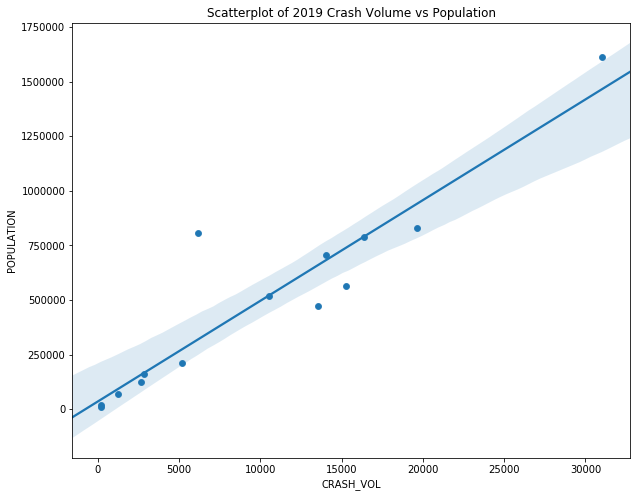

In [22]:
#Scatter plot showing the relationship between population and crash volume
merged.plot(kind='scatter', y='POPULATION', x='CRASH_VOL', figsize = (10,8))

plt.title('Scatterplot of 2019 Crash Volume vs Population')
plt.xlabel('Crash Volume')
plt.ylabel('Population')

sns.regplot(x='CRASH_VOL', y='POPULATION', data = merged) #regression line

In [23]:
merged[['POPULATION', 'CRASH_VOL']].corr()

,POPULATION,CRASH_VOL
POPULATION,1.000000,0.930077
CRASH_VOL,0.930077,1.000000


<em>
<strong> Analysis:</strong><br>
As the population goes up, the crash volume goes up: this indicates a positive direct correlation between Population and Crash Volume just as does the correlation function deducted above<br>
Therefore population is a pretty good predictor of crash volume<br>
The goal now is to increase the Population/Crash Volume ratio e.g if every county had a crash Ratio similar to Suffolk, that will bring the total volume of crashes down
</em>

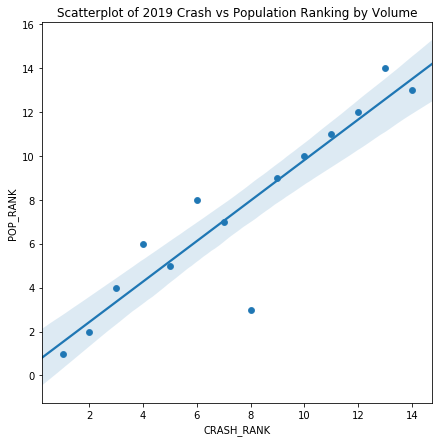

In [24]:
#Scatter plot showing the relationship between population ranking and crash volume ranking
merged.plot(kind='scatter', y='POP_RANK', x='CRASH_RANK', figsize = (7,7))

plt.title('Scatterplot of 2019 Crash vs Population Ranking by Volume')
plt.xlabel('Crash Ranking')
plt.ylabel('Population Ranking')

sns.regplot(x='CRASH_RANK', y='POP_RANK', data = merged) #regression line

<em>
<strong> Observation:</strong><br>
There is one point that is an outlier/anomaly on the 'Scatterplot of 2019 Crash vs Population Ranking by Volume' Chart. This point has a very high ranking (a low number == high ranking) in population compared to ranking low(high number == low ranking) in crashes<br>
This needs to be looked into further to see what Suffolk county is doing that the other counties are not so that they can implement changes that will help mirror Suffolk County's crash vs population ratio
</em>

In [25]:
#filter data by those counties where the population ranking doesn't match the Crash Volume Ranking
Rankings = merged[merged.EQUAL.eq(False)]
Rankings

,CNTY_NAME,POPULATION,POP_RANK,CRASH_VOL,CRASH_RANK,EQUAL,CRASH_RATIO,CRASH_POP_RATIO_RANK
2,SUFFOLK,807252,3,6187,8,False,130,1.0
3,ESSEX,790638,4,16394,3,False,48,9.0
5,BRISTOL,564022,6,15293,4,False,36,13.0
7,HAMPDEN,470406,8,13581,6,False,34,14.0
12,DUKES,17352,13,184,14,False,94,2.0
13,NANTUCKET,11327,14,222,13,False,51,6.0


In [26]:
#show difference in rankings
Rankings['RANK_DIFF'] = Rankings['POP_RANK'] - Rankings['CRASH_RANK']
Rankings

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,CNTY_NAME,POPULATION,POP_RANK,CRASH_VOL,CRASH_RANK,EQUAL,CRASH_RATIO,CRASH_POP_RATIO_RANK,RANK_DIFF
2,SUFFOLK,807252,3,6187,8,False,130,1.0,-5
3,ESSEX,790638,4,16394,3,False,48,9.0,1
5,BRISTOL,564022,6,15293,4,False,36,13.0,2
7,HAMPDEN,470406,8,13581,6,False,34,14.0,2
12,DUKES,17352,13,184,14,False,94,2.0,-1
13,NANTUCKET,11327,14,222,13,False,51,6.0,1


<em>
<strong> Analysis & Recommendation:</strong><br>
In most cases, county population compared to crash volume is consistent and we would expect it to continue to be so even when the population increases. <br>
Counties with negative RANK_DIFF are doing great; they have far fewer crashes when compared to population volume<br>
Counties with positive RANK_DIFF need to improve; they have a larger volume of crashes when compared to population volume<br>
The committee tasked with this mission needs to look at what a county like Suffolk is doing for it to have such a low volume of crashes
<em>

### 3.3 Compare Fatalities per County

In [27]:
#fatalities data
fatalities = df1[df1['NUMB_FATAL_INJR']> 0]
fatalities.head()

,OBJECTID,CITY_TOWN_NAME,CNTY_NAME,CRASH_DATE_TEXT,CRASH_SEVERITY_DESCR,MAX_INJR_SVRTY_CL,CRASH_HOUR,NUMB_VEHC,NUMB_NONFATAL_INJR,NUMB_FATAL_INJR,AMBNT_LIGHT_DESCR,ROAD_SURF_COND_DESCR,RDWY_JNCT_TYPE_DESCR,LAT,LON,SPEED_LIMIT
760,2509862,PHILLIPSTON,WORCESTER,1/7/2019,Fatal injury,Fatal injury (K),4:00:00,1,0,1,Not reported,Not reported,Not reported,42.563053,-72.162972,NaN
761,2509864,CHICOPEE,HAMPDEN,1/7/2019,Fatal injury,Fatal injury (K),4:00:00,1,0,1,Dusk,Dry,Not at junction,42.164499,-72.601875,65.0
888,2510206,SWAMPSCOTT,ESSEX,1/8/2019,Fatal injury,Fatal injury (K),3:00:00,3,2,1,Daylight,Wet,Not at junction,42.473338,-70.917695,25.0
1320,2511079,EAST BRIDGEWATER,PLYMOUTH,1/5/2019,Fatal injury,Fatal injury (K),8:00:00,1,0,1,Dark - lighted roadway,Wet,Not at junction,42.055180,-70.943260,35.0
1719,2511745,STOCKBRIDGE,BERKSHIRE,1/11/2019,Unknown,Fatal injury (K),11:00:00,2,0,1,Not reported,Not reported,Not reported,42.305149,-73.293336,NaN


In [28]:
df1.NUMB_FATAL_INJR.unique()

array([0, 1, 2, 3])

In [29]:
#Check and sort the number of fatal crashes per county
fat = fatalities[['CNTY_NAME','NUMB_FATAL_INJR']]
fat_grp = fat.groupby(['CNTY_NAME'], as_index =False).sum()
fat_grpsort = fat_grp.sort_values(by='NUMB_FATAL_INJR', ascending = False)
fat_grpsort

,CNTY_NAME,NUMB_FATAL_INJR
2,BRISTOL,51
11,WORCESTER,47
7,MIDDLESEX,43
5,HAMPDEN,42
3,ESSEX,35
8,NORFOLK,33
9,PLYMOUTH,32
10,SUFFOLK,24
1,BERKSHIRE,13
0,BARNSTABLE,7


<em>
<strong> Analysis & Recommendation:</strong><br>
Even though MIDDLESEX is the county with the most Crashes, the county with the most fatalities during the 2019 period is BRISTOL. A closer look at the crashes occuring in BRISTOL is needed to see what changes need to be made
</em>

In [30]:
fat2 = fatalities[['CNTY_NAME','CITY_TOWN_NAME','NUMB_FATAL_INJR']]
fat_grp2 = fat2.groupby(['CNTY_NAME','CITY_TOWN_NAME'], as_index =False).sum()
fat_grpsort2 = fat_grp2.sort_values(by='NUMB_FATAL_INJR', ascending = False)
fat_grpsort2.head(10)

,CNTY_NAME,CITY_TOWN_NAME,NUMB_FATAL_INJR
128,SUFFOLK,BOSTON,20
61,HAMPDEN,SPRINGFIELD,9
159,WORCESTER,WORCESTER,8
12,BRISTOL,ATTLEBORO,8
28,BRISTOL,TAUNTON,8
54,HAMPDEN,CHICOPEE,8
42,ESSEX,METHUEN,6
83,MIDDLESEX,MARLBOROUGH,5
62,HAMPDEN,WEST SPRINGFIELD,5
56,HAMPDEN,HOLYOKE,5


<em>
<strong> Analysis & Recommendation:</strong><br>
Boston city in a County that  has had the most fatalities and therefore focus should start here
</em>

### 3.4 Compare Crash Severity per County

In [31]:
#count # of crashes by Severity per County
severity = df1[['CNTY_NAME','NUMB_VEHC','CRASH_SEVERITY_DESCR']]
sev_grp = severity.groupby(['CNTY_NAME','CRASH_SEVERITY_DESCR'], as_index =False).count()
sev_grpsort = sev_grp.sort_values(by='NUMB_VEHC', ascending = False)
sev_grpsort.head()

,CNTY_NAME,CRASH_SEVERITY_DESCR,NUMB_VEHC
42,MIDDLESEX,Property damage only (none injured),22198
66,WORCESTER,Property damage only (none injured),14195
22,ESSEX,Property damage only (none injured),11810
13,BRISTOL,Property damage only (none injured),10335
51,NORFOLK,Property damage only (none injured),9940


In [32]:
#shows severity statistics by county
sev_pivot = sev_grpsort.pivot(index='CRASH_SEVERITY_DESCR', columns='CNTY_NAME')
sev_pivot = sev_pivot.fillna(0)#fill missing values with 0
pd.options.display.float_format = '{:,.0f}'.format
sev_pivot

NUMB_VEHC                                 \
CNTY_NAME                           BARNSTABLE BERKSHIRE BRISTOL DUKES  ESSEX   
CRASH_SEVERITY_DESCR                                                            
Fatal injury                                 7        12      46     0     34   
Non-fatal injury                         1,290       546   3,890    56  3,579   
Not Reported                               117        76     699    10    653   
Property damage only (none injured)      3,731     1,980  10,335   117 11,810   
Unknown                                     62        44     323     1    318   

                                                                          \
CNTY_NAME                           FRANKLIN HAMPDEN HAMPSHIRE MIDDLESEX   
CRASH_SEVERITY_DESCR                                                       
Fatal injury                               5      38         6        40   
Non-fatal injury                         263   3,689       599     6,417   
Not Reported                              51     625        87     1,481   
Property damage only (none injured)      923   8,967     2,103    22,198   
Unknown                                   14     262        59       882   

                                                                        \
CNTY_NAME                           NANTUCKET NORFOLK PLYMOUTH SUFFOLK   
CRASH_SEVERITY_DESCR                                                     
Fatal injury                                0      31       32      21   
Non-fatal injury                           22   3,448    3,064   1,623   
Not Reported                               51     417      260     327   
Property damage only (none injured)       133   9,940    6,998   4,092   
Unknown                                    16     237      160     124   

                                               
CNTY_NAME                           WORCESTER  
CRASH_SEVERITY_DESCR                           
Fatal injury                               45  
Non-fatal injury                        4,078  
Not Reported                              785  
Property damage only (none injured)    14,195  
Unknown                                   565

<em>
<strong> Analysis/Observation:</strong><br>
There are 2 counties that had no fatalities in 2019: DUKES and NANTUCKET.  This is great news!
</em>

In [33]:
sev_pivot2 = pd.pivot_table(sev_grpsort, index =['CNTY_NAME','CRASH_SEVERITY_DESCR'])
sev_pivot2 = sev_pivot2.fillna(0)
sev_pivot2.head(10)

NUMB_VEHC
CNTY_NAME  CRASH_SEVERITY_DESCR                          
BARNSTABLE Fatal injury                                 7
           Non-fatal injury                          1290
           Not Reported                               117
           Property damage only (none injured)       3731
           Unknown                                     62
BERKSHIRE  Fatal injury                                12
           Non-fatal injury                           546
           Not Reported                                76
           Property damage only (none injured)       1980
           Unknown                                     44

In [34]:
#shows severity statistics by county, sum the severity type and present data as integers
sev_pivot3 = sev_grpsort.pivot_table('NUMB_VEHC', index='CRASH_SEVERITY_DESCR', columns='CNTY_NAME', aggfunc='sum',margins=True, margins_name = 'Total')
sev_pivot3 = sev_pivot3.fillna(0)#fill missing values with 0
sev_pivot3

CNTY_NAME,BARNSTABLE,BERKSHIRE,BRISTOL,DUKES,ESSEX,FRANKLIN,HAMPDEN,HAMPSHIRE,MIDDLESEX,NANTUCKET,NORFOLK,PLYMOUTH,SUFFOLK,WORCESTER,Total
CRASH_SEVERITY_DESCR,,,,,,,,,,,,,,,
Fatal injury,7,12,46,0,34,5,38,6,40,0,31,32,21,45,317
Non-fatal injury,"1,290",546,"3,890",56,"3,579",263,"3,689",599,"6,417",22,"3,448","3,064","1,623","4,078",32564
Not Reported,117,76,699,10,653,51,625,87,"1,481",51,417,260,327,785,5639
Property damage only (none injured),"3,731","1,980","10,335",117,"11,810",923,"8,967","2,103","22,198",133,"9,940","6,998","4,092","14,195",97522
Unknown,62,44,323,1,318,14,262,59,882,16,237,160,124,565,3067
Total,"5,207","2,658","15,293",184,"16,394","1,256","13,581","2,854","31,018",222,"14,073","10,514","6,187","19,668",139109


In [35]:
#format numbers
pd.options.display.float_format = '{:,.0f}'.format
sev_pivot4=sev_pivot3
sev_pivot4

CNTY_NAME,BARNSTABLE,BERKSHIRE,BRISTOL,DUKES,ESSEX,FRANKLIN,HAMPDEN,HAMPSHIRE,MIDDLESEX,NANTUCKET,NORFOLK,PLYMOUTH,SUFFOLK,WORCESTER,Total
CRASH_SEVERITY_DESCR,,,,,,,,,,,,,,,
Fatal injury,7,12,46,0,34,5,38,6,40,0,31,32,21,45,317
Non-fatal injury,"1,290",546,"3,890",56,"3,579",263,"3,689",599,"6,417",22,"3,448","3,064","1,623","4,078",32564
Not Reported,117,76,699,10,653,51,625,87,"1,481",51,417,260,327,785,5639
Property damage only (none injured),"3,731","1,980","10,335",117,"11,810",923,"8,967","2,103","22,198",133,"9,940","6,998","4,092","14,195",97522
Unknown,62,44,323,1,318,14,262,59,882,16,237,160,124,565,3067
Total,"5,207","2,658","15,293",184,"16,394","1,256","13,581","2,854","31,018",222,"14,073","10,514","6,187","19,668",139109


In [36]:
#shows severity statistics by description
severity2 = df1[['NUMB_VEHC','CRASH_SEVERITY_DESCR']]
sev_class = severity2.groupby(['CRASH_SEVERITY_DESCR'], as_index =True).count()
sev_class = sev_class.sort_values(by='NUMB_VEHC', ascending = False)
sev_class

,NUMB_VEHC
CRASH_SEVERITY_DESCR,
Property damage only (none injured),97522
Non-fatal injury,32564
Not Reported,5639
Unknown,3067
Fatal injury,317


<function matplotlib.pyplot.show(*args, **kw)>

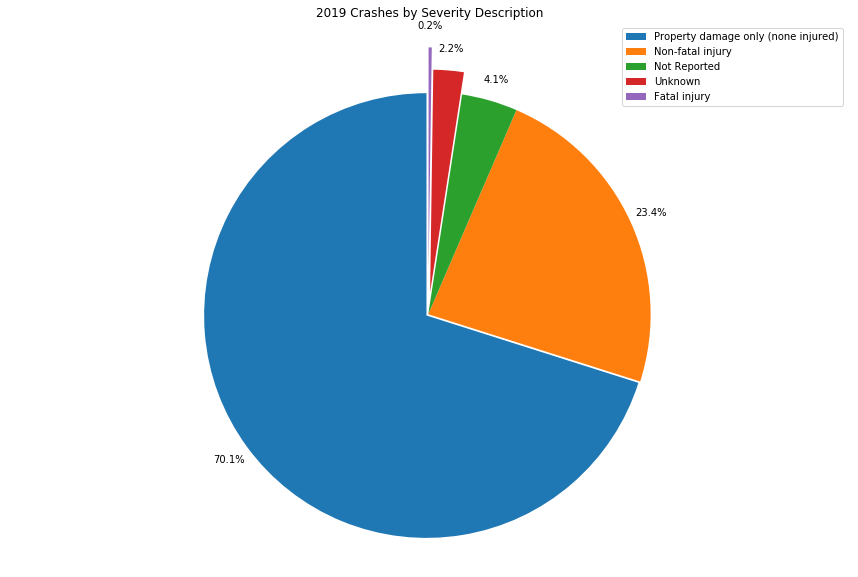

In [37]:
explode_list = (0.01, 0, 0, 0.1, 0.2)
sev_class['NUMB_VEHC'].plot(kind='pie',
                           figsize =(15,10),    # set chart size
                           autopct='%1.1f%%',   # add in percentages
                           startangle=90,       # start angles position
                           labels = None,       # turn off labels on chart
                           pctdistance=1.10,    # ratio between center of each pie slice and start of the text 
                           explode=explode_list
                           )
plt.title('2019 Crashes by Severity Description')

plt.axis('equal')
plt.ylabel('')


plt.legend(labels=sev_class.index, loc = 'best')
plt.show

<em>
<strong> Observation & Analysis:</strong><br>
Most crashes result in <strong> Property damage</strong> i.e 70.1%, followed by <strong>Non_fatal injury</strong> at 23.4%.  These 2 account for 93.5% of the effects of crashes; the goal is to reduce all crashes<br>
A closer look of why these accidents occur will help figure out what to do to reduce them<br>
If nothing is done regarding any of this numbers, crash volumes may increase and become more fatal in the future.
</em>

In [38]:
#convert a pandas pivot table to a regular dataframe for more analysis
new_df = pd.DataFrame(sev_pivot4.to_records())
new_df = new_df.drop('Total', axis=1)
new_df

,CRASH_SEVERITY_DESCR,BARNSTABLE,BERKSHIRE,BRISTOL,DUKES,ESSEX,FRANKLIN,HAMPDEN,HAMPSHIRE,MIDDLESEX,NANTUCKET,NORFOLK,PLYMOUTH,SUFFOLK,WORCESTER
0,Fatal injury,7,12,46,0,34,5,38,6,40,0,31,32,21,45
1,Non-fatal injury,"1,290",546,"3,890",56,"3,579",263,"3,689",599,"6,417",22,"3,448","3,064","1,623","4,078"
2,Not Reported,117,76,699,10,653,51,625,87,"1,481",51,417,260,327,785
3,Property damage only (none injured),"3,731","1,980","10,335",117,"11,810",923,"8,967","2,103","22,198",133,"9,940","6,998","4,092","14,195"
4,Unknown,62,44,323,1,318,14,262,59,882,16,237,160,124,565
5,Total,"5,207","2,658","15,293",184,"16,394","1,256","13,581","2,854","31,018",222,"14,073","10,514","6,187","19,668"


In [39]:
#continue with formating dataframe
dfz = pd.melt(new_df, id_vars ='CRASH_SEVERITY_DESCR', var_name = 'CNTY_NAME')
dfz.head(10)

,CRASH_SEVERITY_DESCR,CNTY_NAME,value
0,Fatal injury,BARNSTABLE,7
1,Non-fatal injury,BARNSTABLE,"1,290"
2,Not Reported,BARNSTABLE,117
3,Property damage only (none injured),BARNSTABLE,"3,731"
4,Unknown,BARNSTABLE,62
5,Total,BARNSTABLE,"5,207"
6,Fatal injury,BERKSHIRE,12
7,Non-fatal injury,BERKSHIRE,546
8,Not Reported,BERKSHIRE,76
9,Property damage only (none injured),BERKSHIRE,"1,980"


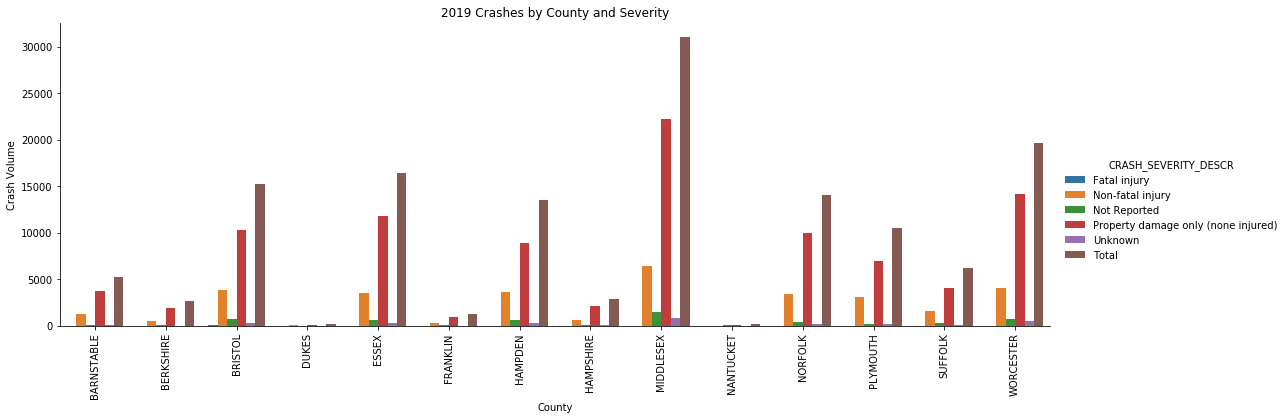

In [40]:
bchart = sns.catplot(x='CNTY_NAME', y='value', hue='CRASH_SEVERITY_DESCR', data=dfz, kind='bar', height=5, aspect=3)
bchart.set(xlabel = "County", ylabel = "Crash Volume")
    
plt.xticks(rotation='vertical') # x axis orientation
plt.title('2019 Crashes by County and Severity')

bchart

<em>
<strong> Analysis and Recommendations:</strong><br>
Massachusetts DOT should focus on reducing "Property Damage" incidences and all "Injuries" starting in Middlesex County since this county has the most volume of these.  <br>
Counties with crashes per population/area should share with Middlesex some ideas of why their numbers are lower.<br>
Massachusetts DOT should ensure that all police officers are encouraged and trained to record/populate severity data for every accident that they enter into their systems so that the 'Not Reported" number can be bucketized & addressed appropriately <br>
</em>

### 3.5 Reviewing Crash Lighting Statistics

In [41]:
#shows lighting statistics
light = df1[['NUMB_VEHC','AMBNT_LIGHT_DESCR']]
light_class = light.groupby(['AMBNT_LIGHT_DESCR'], as_index =True).count()
light_class = light_class.sort_values(by='NUMB_VEHC', ascending = False)
light_class

,NUMB_VEHC
AMBNT_LIGHT_DESCR,
Daylight,94680
Dark - lighted roadway,28429
Dark - roadway not lighted,7661
Dusk,3691
Dawn,2373
Unknown,1027
Dark - unknown roadway lighting,900
Other,183
Not reported,165


<function matplotlib.pyplot.show(*args, **kw)>

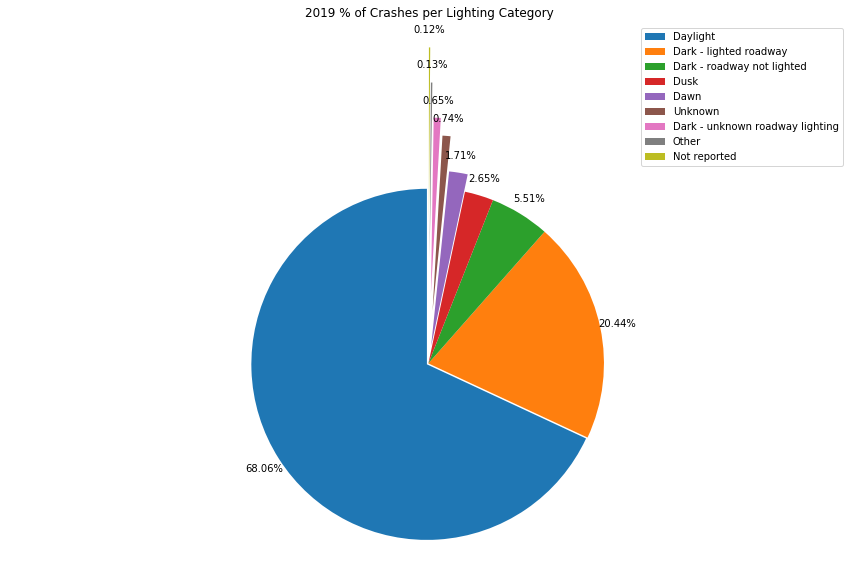

In [42]:
explode_list = (0.01, 0, 0, 0, 0.1, 0.3, 0.4, 0.6, 0.8)
light_class['NUMB_VEHC'].plot(kind='pie',
                           figsize =(15,10),    # set chart size
                           autopct='%1.2f%%',   # add in percentages
                           startangle=90,       # start angles position
                           labels = None,       # turn off labels on chart
                           pctdistance=1.10,    # ratio between center of each pie slice and start of the text 
                           explode=explode_list
                           )
plt.title('2019 % of Crashes per Lighting Category')

plt.axis('equal')
plt.ylabel('')
plt.legend(labels=light_class.index, loc = 'best')

plt.show

<em>
<strong> Recommedation:</strong><br>
Research should be done to determine if the 31.94% crashes that happen when it is not daylight happen in areas where lighting needs to be improved upon and why some dark roadways have no lighting
Massachusetts DOT should ensure all crashes reported have clear lighting conditions specified so that the "Not Reported", "Unknown" and "Other" number can be bucketized appropriately
</em>